In [1]:
# Plot One 1D array of ECG with attention
import neurokit2 as nk
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1500
import numpy as np
import matplotlib.pyplot as plt
from ecg_plot import plot_1

In [2]:
filename = 'A01443'
# Load the array from the .npy file
file_path = '/home/saptarshi/Research/encoder_decoder/physionet2017challenge/OneD_data/' + str(filename) + '.npy'
data = np.load(file_path)

In [4]:
rsignals, rpeaks = nk.ecg_peaks(data, method='hamilton2002',sampling_rate=300)

# Visualize P-peaks and T-peaks
signal_dwt, waves_dwt = nk.ecg_delineate(data, 
                                         rpeaks, 
                                         sampling_rate=300, 
                                         show_type='peaks',
                                         show=False)

index = {"S":[x for x in waves_dwt['ECG_S_Peaks'] if x == x],
         "P":[x for x in waves_dwt['ECG_P_Peaks'] if x == x],
         "Q":[x for x in waves_dwt['ECG_Q_Peaks'] if x == x],
         "T":[x for x in waves_dwt['ECG_T_Peaks'] if x == x],
         "R": rpeaks['ECG_R_Peaks']
}

peaks ={"S":np.array(signal_dwt["ECG_S_Peaks"]),
        "P":np.array(signal_dwt["ECG_P_Peaks"]),
        "Q":np.array(signal_dwt["ECG_Q_Peaks"]),
        "T":np.array(signal_dwt["ECG_T_Peaks"]),
        "R":np.array(rsignals["ECG_R_Peaks"])
}

In [7]:
# Actual label extractor
import pandas as pd
def actual_label(filename):
    label_file = '/home/saptarshi/Research/encoder_decoder/physionet2017challenge/REFERENCE-original.csv'
    df = pd.read_csv(label_file)
    search_value = filename
    result_value = df[df.iloc[:, 0] == search_value].iloc[0, 1]
    return result_value

actual_label(filename)

'A'

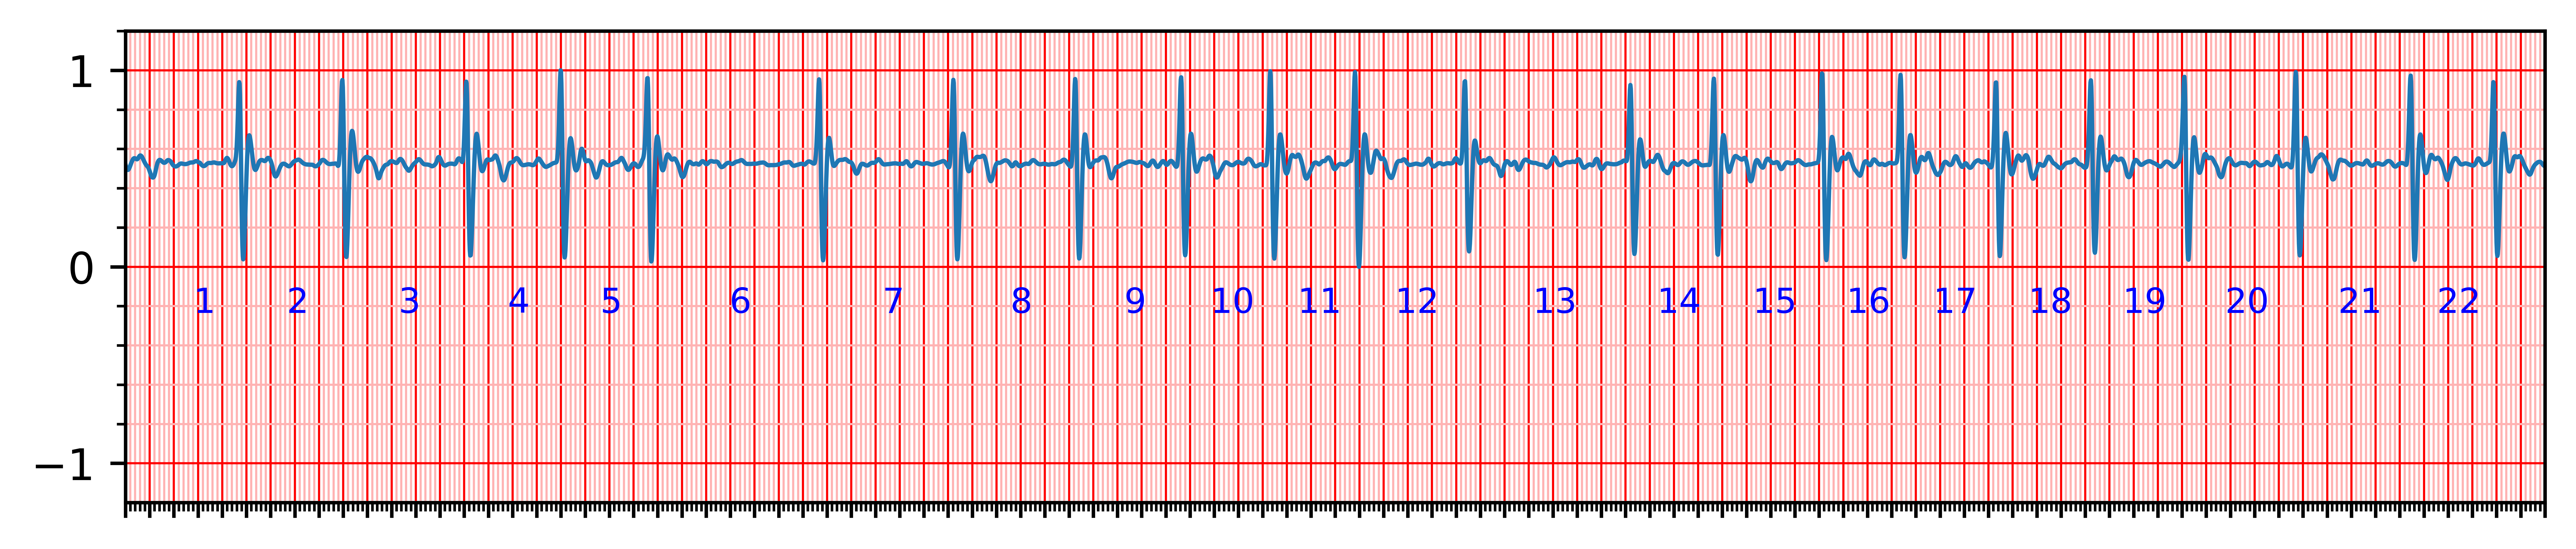

In [10]:
k = 5    #final for paper
#_,top_k_indices=top_k(area_list,k=k)  # mark 50 percent of rr intervals
fig, ax = plt.subplots(1,1,figsize=(10, 2))
plot_1(ecg=data, attention =None, attention_area=None, top_k= None,
        peaks= peaks,valid_p_peaks=None,RR_length_outlier=None,peaks_index=index,at_thres=0.0,
        fig=fig, ax=ax, 
        sample_rate=300,line_w=1.0,
          title = 'ECG',
          ecg_amp=1.2,timetick=0.2,fig_height=2,fig_width=12,numbering=True)
#save_path = 'Thesis_pics/' + str(filename) + '_numbered' + '.pdf'   #attention_area =mod_attention, attention =data2,top_k = top_k_indices
# Save the plot with axes and markings
#plt.savefig(save_path)
plt.show()


In [12]:
import pandas as pd
import os

# Load the CSV file
csv_file_path = '/home/saptarshi/Research/encoder_decoder/physionet2017challenge/REFERENCE-original.csv' 
data = pd.read_csv(csv_file_path,header=None)

filtered_data = data[data[1] == 'A']

search_directory = '/home/saptarshi/Research/encoder_decoder/physionet2017challenge/OneD_data'  

# Get the list of filenames from the filtered data
filenames_to_search = filtered_data[0].tolist()
print(filenames_to_search)

# Search for the files in the specified directory and perform a task if found
for filename in filenames_to_search:
    file_path = os.path.join(search_directory, filename)
    if os.path.exists(file_path):
        # Perform a certain task on the found file
        pass
    else:
        print(f"File not found: {filename}")

['A00004', 'A00009', 'A00015', 'A00027', 'A00054', 'A00067', 'A00071', 'A00087', 'A00090', 'A00100', 'A00101', 'A00102', 'A00107', 'A00128', 'A00132', 'A00137', 'A00141', 'A00155', 'A00156', 'A00164', 'A00208', 'A00216', 'A00217', 'A00225', 'A00231', 'A00247', 'A00253', 'A00267', 'A00271', 'A00301', 'A00321', 'A00375', 'A00395', 'A00397', 'A00405', 'A00422', 'A00432', 'A00438', 'A00439', 'A00441', 'A00456', 'A00465', 'A00473', 'A00486', 'A00509', 'A00519', 'A00520', 'A00524', 'A00542', 'A00551', 'A00567', 'A00587', 'A00591', 'A00592', 'A00611', 'A00613', 'A00614', 'A00621', 'A00624', 'A00625', 'A00643', 'A00648', 'A00660', 'A00662', 'A00666', 'A00670', 'A00680', 'A00691', 'A00701', 'A00704', 'A00706', 'A00707', 'A00722', 'A00725', 'A00733', 'A00739', 'A00772', 'A00795', 'A00798', 'A00837', 'A00860', 'A00867', 'A00869', 'A00873', 'A00885', 'A00888', 'A00925', 'A00932', 'A00933', 'A00939', 'A00951', 'A00954', 'A00964', 'A00972', 'A00974', 'A00982', 'A01005', 'A01013', 'A01019', 'A01024',